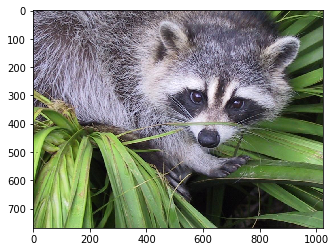

In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

image = misc.face()
plt.imshow(image)
plt.show()

In [2]:
image.shape

(768, 1024, 3)

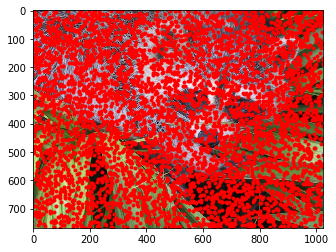

In [3]:
vector_space = [(x, y) for x in range(image.shape[0]) for y in range(image.shape[1])]

import random as rand
rand.seed()

sample_size = 5000

samples = rand.sample(vector_space, sample_size)

plt.imshow(image)
plt.plot(*reversed(list(zip(*samples))), 'r.')
plt.show()

In [4]:
from sklearn.neighbors import KNeighborsRegressor

k = 5
metric = 'minkowski'
p = 2

knn = KNeighborsRegressor(n_neighbors = k, metric=metric, p=p)
knn.fit(samples, [image[tuple(coords)] for coords in samples])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [5]:
predicted_image = knn.predict(vector_space).astype('uint8').reshape(image.shape)

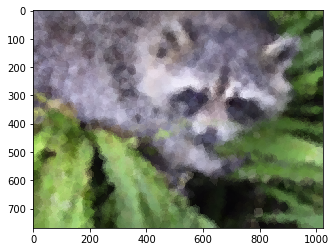

In [6]:
plt.imshow(predicted_image)
plt.show()